# AD654: Marketing Analytics Assignment V

## Part I: Working with Time Series Data

A. Picking company

I choose Nvidia, because last times this company have many success like producing chips and I like and follow Jensen Huang who the Nvidia CEO

Nvidia's ticker symbol is "NVDA". It is listed on the NASDAQ stock exchange.

B. Go to Yahoo! Finance.

I downloaded one year’s of the company’s data.

C. Bring the dataset

In [28]:
import pandas as pd
df=pd.read_csv("NVDA.csv", index_col='Date', parse_dates=True)

In [29]:
df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2023-04-19,273.609985,280.000000,272.320007,279.309998,279.220428,35866000
2023-04-20,276.709991,280.299988,270.000000,271.040009,270.953094,42771300
2023-04-21,269.519989,271.829987,267.220001,271.190002,271.103058,34510300
2023-04-24,270.130005,273.660004,266.709991,270.420013,270.333282,33928200
2023-04-25,270.779999,272.470001,262.250000,262.410004,262.325867,37852700


In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 253 entries, 2023-04-19 to 2024-04-19
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       253 non-null    float64
 1   High       253 non-null    float64
 2   Low        253 non-null    float64
 3   Close      253 non-null    float64
 4   Adj Close  253 non-null    float64
 5   Volume     253 non-null    int64  
dtypes: float64(5), int64(1)
memory usage: 13.8 KB


D. Indexed by time values

Yes, it is. Because when I checked the dataframe I saw that raws sorted by date.

E. Index attribute of your time series

a.

In [31]:
# Maximum value of the index
max_index = df.index.max()
print("Maximum Index:", max_index)

# Minimum value of the index
min_index = df.index.min()
print("Minimum Index:", min_index)

Maximum Index: 2024-04-19 00:00:00
Minimum Index: 2023-04-19 00:00:00


b.

In [32]:
argmax_index = df.index.argmax()
argmin_index = df.index.argmin()

print(argmax_index)
print(argmin_index)

252
0


c. Results

Max and Min Indexes shows us max and min values of index.

On the other hand, argmax and Argmin locate where in the DataFrame the maximum and minimum values of a particular variable occur.

F. Visualize

a.

<Axes: xlabel='Date'>

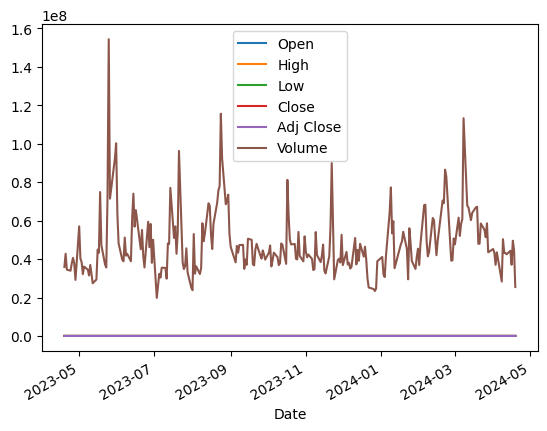

In [33]:
df.plot()

i.  In above graph, I can just see Volume values because these values are more higher than 'Open', 'High', 'Low', 'Close' and 'Adj Close'.

Understanding graph more clearly:
- We could create separate plots for each variable or at least separate the 'Volume' from the stock prices.
- We could use separate scales. Use a secondary y-axis for the volume so that both the stock prices and the volume can be visually analyzed.

b.


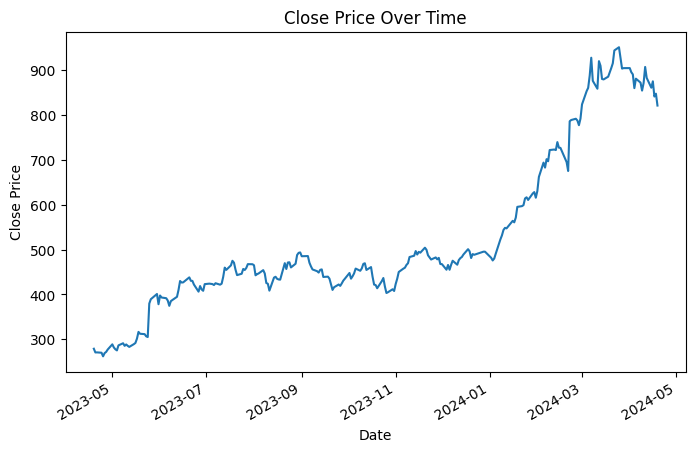

In [34]:
import matplotlib.pyplot as plt

df['Close'].plot(figsize=(8,5))
plt.title('Close Price Over Time')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.show()

The graph now shows a single time series of the 'Close' price over time, without any other variables. This simplification allows us to focus on the trend of the closing prices. The 'Close' price begins at a lower value and shows a general upward trend over the period.

c. Plotting a subset of your data

*i.*

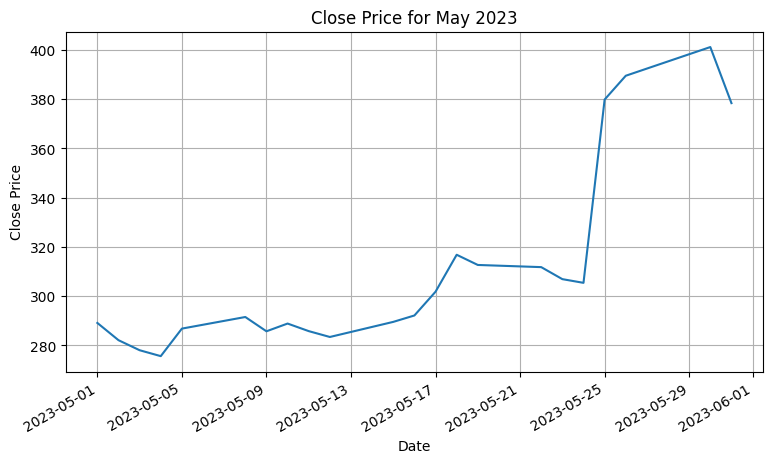

In [35]:
import matplotlib.pyplot as plt

# Define the one-month period
start_date = '2023-05-01'
end_date = '2023-05-31'

# Select the period of data
one_month_close = df['Close'][start_date:end_date]

# Plot the data
one_month_close.plot(figsize=(9,5))
plt.title('Close Price for May 2023')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.grid(True)
plt.show()

*ii*.

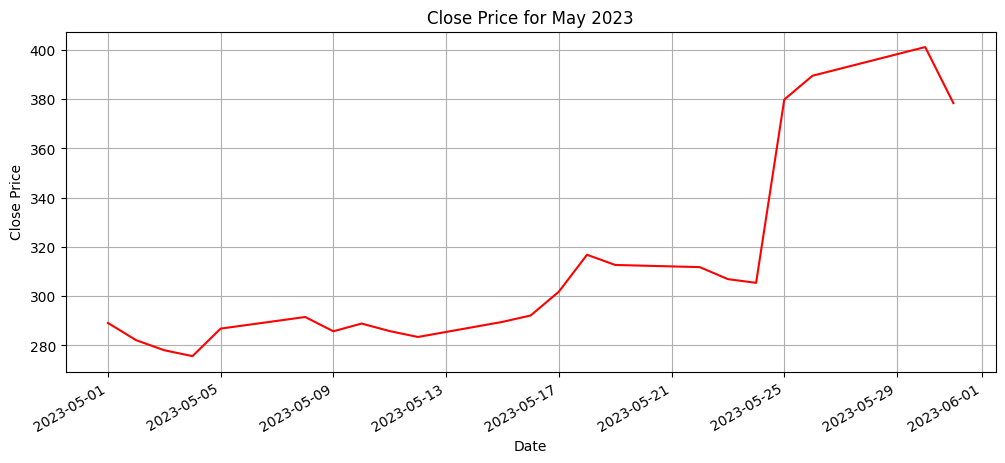

In [36]:
one_month_close.plot(figsize=(12, 5), color='red')
# Customizing the plot
plt.title('Close Price for May 2023')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.grid(True)
plt.show()

G. Rolling windows

a.

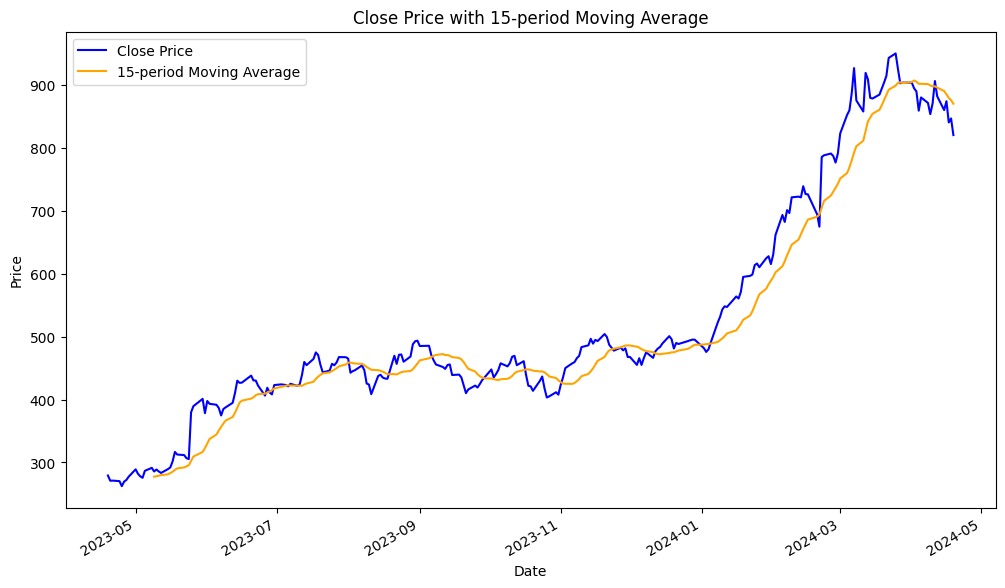

In [37]:
# Calculate the 15-day moving average
moving_average_15 = df['Close'].rolling(window=15).mean()

# Plot the original 'Close' prices
df['Close'].plot(figsize=(12, 7), color='blue', title='Close Price with 15-period Moving Average')

# Overlay the 15-day moving average on the same plot
moving_average_15.plot(color='orange')

# Adding labels and legend
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend(['Close Price', '15-period Moving Average'])
plt.show()

b.

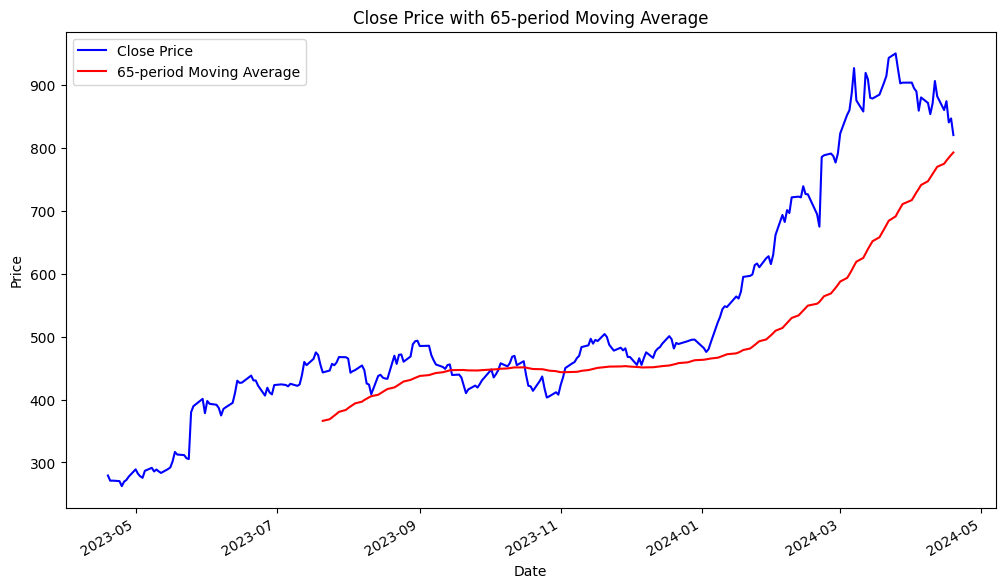

In [38]:
# Calculate the 65-period moving average
moving_average_65 = df['Close'].rolling(window=65).mean()

# Plot the original 'Close' prices
df['Close'].plot(figsize=(12, 7), color='blue', title='Close Price with 65-period Moving Average')

# Overlay the 65-period moving average on the same plot
moving_average_65.plot(color='red')

# Adding labels and legend
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend(['Close Price', '65-period Moving Average'])
plt.show()

c.

The 15-period moving average closely tracks daily closing prices, showing short-term price movements and trends with sensitivity.
In contrast, the 65-period moving average is smoother and slower to react, providing a clearer view of the longer-term trend by filtering out daily price fluctuations. Shorter moving averages are beneficial for identifying quick changes, while longer moving averages offer a more stable trend indication. Traders often use both to balance the short-term insights with the stability of long-term trend analysis.

H. Resampling

a.

In [39]:
# Resample the 'Close' prices to get quarterly mean values
quarterly_close_means = df['Close'].resample('Q').mean()

# Display the resampled data
print(quarterly_close_means)

Date
2023-06-30    345.093138
2023-09-30    448.028413
2023-12-31    463.419842
2024-03-31    724.803769
2024-06-30    870.113668
Freq: Q-DEC, Name: Close, dtype: float64


*i*.

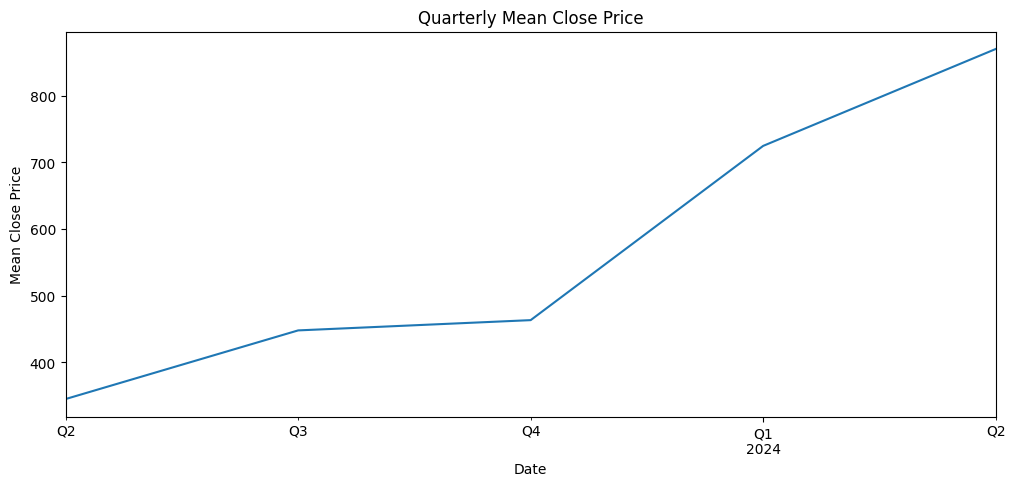

In [40]:
# Plot the resampled quarterly mean 'Close' prices
quarterly_close_means.plot(figsize=(12, 5), title='Quarterly Mean Close Price')
plt.xlabel('Date')
plt.ylabel('Mean Close Price')
plt.show()

*ii*.

We don't have to use daily data for our analysis, always.  Sometimes we should use montly or quarterly data for a better analysis. For example, in agriculture, a farmer could resample daily temperature readings to monthly averages to determine the best planting or harvesting, accounting for climate trends without being misled by daily weather anomalies. And like that there are a lot of situation that tend to be time.

## Part II: Marketing Mix Modeling

In [42]:
import pandas as pd
df=pd.read_csv("schwab_ads.csv")
df.head()

,Web,Bus_Stop,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


a. New variable

In [43]:
df["total_spending"]=df["Web"]+df["Bus_Stop"]+df["Newspaper"]

In [44]:
df.head()

,Web,Bus_Stop,Newspaper,Sales,total_spending
0,230.1,37.8,69.2,22.1,337.1
1,44.5,39.3,45.1,10.4,128.9
2,17.2,45.9,69.3,12.0,132.4
3,151.5,41.3,58.5,16.5,251.3
4,180.8,10.8,58.4,17.9,250.0


b. Correlation with total_spending

In [45]:
correlation = df['total_spending'].corr(df['Sales'])
print("Correlation between total spending and sales:", correlation)

Correlation between total spending and sales: 0.924917006249931


The correlation coefficient of  0.925 suggests a strong positive relationship between total marketing spending and sales. This means that as the amount of money spent on marketing increases, sales tend to increase.

However, it's important to note that correlation does not imply causation.  We can't conclude that more advertising spending directly leads to more sales based on this correlation alone because there might be other reasons for this relation.

c. Correlation with web, bus stop ad, and newspaper spending

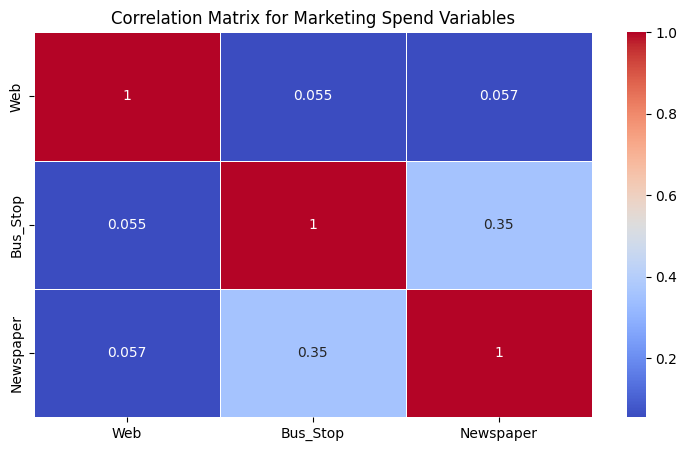

In [46]:
import seaborn as sns
import matplotlib.pyplot as plt

spending_data = df[['Web', 'Bus_Stop', 'Newspaper']]

# Calculating the correlation matrix
correlation_matrix = spending_data.corr()

# Plotting the correlation matrix
plt.figure(figsize=(9, 5))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix for Marketing Spend Variables')
plt.show()

As you can see above, there is no a strong relationship between these variables- max correlation is 0.35- so we can continue with these variables our model.

d. Build Model

In [47]:
import statsmodels.api as sm

# independent variables (X) and the dependent variable (Y)
X = df[['Web', 'Bus_Stop', 'Newspaper']]
Y = df['Sales']

# Adding a constant to the model
X = sm.add_constant(X)

# Building the ordinary least squares (OLS) model
model = sm.OLS(Y, X).fit()

# The summary of the model
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.903
Model:                            OLS   Adj. R-squared:                  0.901
Method:                 Least Squares   F-statistic:                     605.4
Date:                Sat, 20 Apr 2024   Prob (F-statistic):           8.13e-99
Time:                        16:45:43   Log-Likelihood:                -383.34
No. Observations:                 200   AIC:                             774.7
Df Residuals:                     196   BIC:                             787.9
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          4.6251      0.308     15.041      0.0

*i*. p value of F statictic for this model is 8.13e-99, this is an extremely small number. The very small p-value of the F-statistic suggests that at least one of the predictor variables (Web spending, Bus stop ad spending, or Newspaper spending) is significantly related to the sales. It indicates a strong evidence that my model is statistically significant.

*ii*.

Web spending:
p-value: 0.000
This suggests that Web spending has a statistically significant positive effect on sales. This means that Web spending is a very effective predictor of sales.

Bus Stop ad spending:
p-value: 0.000
Similar to Web spending, Bus Stop ad spending also shows a statistically significant positive effect on sales.

Newspaper spending:
p-value: 0.954
Unlike the other two predictors, Newspaper spending does not show a statistically significant effect on sales.




E. Build another model

In [48]:
import statsmodels.api as sm

# Create the interaction term
df['Web_BusStop_Interaction'] = df['Web'] * df['Bus_Stop']

X = df[['Web', 'Bus_Stop', 'Web_BusStop_Interaction']]

Y = df['Sales']

X = sm.add_constant(X)

model = sm.OLS(Y, X).fit()

print(model.summary())


                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.914
Model:                            OLS   Adj. R-squared:                  0.913
Method:                 Least Squares   F-statistic:                     694.7
Date:                Sat, 20 Apr 2024   Prob (F-statistic):          3.90e-104
Time:                        16:45:48   Log-Likelihood:                -370.83
No. Observations:                 200   AIC:                             749.7
Df Residuals:                     196   BIC:                             762.9
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                     

*i*.

- Web Spending
p-value: 0.000
The low p-value suggests that web ad spending is highly significant in predicting sales. This means that increases in web ad spending are strongly associated with increases in sales.

- Bus Stop Ad Spending:
p-value: 0.005
Bus stop ad spending is also statistically significant, though less so compared to web ad spending. It still positively affects sales, indicating that higher spending on bus stop ads is associated with higher sales.

- Interaction between Web and Bus Stop Ad Spending:
p-value: 0.000
The interaction term has a very low p-value, indicating that the combined effect of web and bus stop ad spending on sales is statistically significant.

*ii*.

In [49]:
#Without intecation variables:
X = df[['Web', 'Bus_Stop']]

Y = df['Sales']

X = sm.add_constant(X)

simple_model = sm.OLS(Y, X).fit()

print(simple_model.summary())


                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.903
Model:                            OLS   Adj. R-squared:                  0.902
Method:                 Least Squares   F-statistic:                     912.7
Date:                Sat, 20 Apr 2024   Prob (F-statistic):          2.39e-100
Time:                        16:45:52   Log-Likelihood:                -383.34
No. Observations:                 200   AIC:                             772.7
Df Residuals:                     197   BIC:                             782.6
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          4.6309      0.290     15.952      0.0

Model with interaction term has 0.914 R squared value, while the new model has 0.941.
The model with the interaction term between web and bus stop ads shows how these ads work together to affect sales. The simpler model, without the interaction, is easier to understand and shows a higher R-squared, indicating it explains more about sales using fewer details. The best model to choose depends on whether you need simple explanations or detailed insights about how advertising influence sales together.

*iii*.

In [50]:
# create new data point
new_data = pd.DataFrame({
    'const': [1],  # add a constant term (intercept)
    'Web': [150],  # units of web ad spending
    'Bus_Stop': [24]  # units of bus stop ad spending
})

predicted_sales = simple_model.predict(new_data)

print(f"Predicted sales: {predicted_sales[0]:.2f} units")


Predicted sales: 15.37 units


Based on my model and the input values of 150 units of web ad spending and 24 units of bus stop ad spending, the predicted sales outcome is approximately 15 units.It suggests that with this level of investment in advertising, the marketer can expect sales to be around 15.37 units, given the model's current understanding of the data and relationships between these variables.

*iv*.

The interaction effect in a regression model tells us whether spending money on both advertising channels together does something that wouldn't be expected just by looking at each ad individual effect.

For a marketer, this means that the interaction effect can show combining web and bus stop advertisements could lead to a greater increase in sales than just the their separate impacts.
For example, if the interaction effect is significant, it could suggest that bus stop ads might be more effective in driving sales when they are supported by web advertising, because this way we could increase brand visibility across multiple platforms.

f. Example of intecation term

I have consider "diet" topic, because peoples want to make an efficent diet to loss weight but both of diet program and physical activity are very crucial for a succesful diet, not only one of them.
In a study assessing a diet program's, we could include an interaction term between diet program and physical activity levels. This interaction term helps determine if the diet's impact on weight loss is enhanced or diminished by varying levels of physical activity.  A positive interaction could suggest that combining the diet with more exercise leads to greater weight loss. It makes sense for me.